In [1]:
#UMAP clustering through scanpy


In [2]:
#imports

In [2]:
import numpy as np
import pandas as pd
import scanpy as sc

In [3]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.9.5 anndata==0.9.1 umap==0.5.4 numpy==1.23.5 scipy==1.10.1 pandas==1.5.3 scikit-learn==1.2.2 statsmodels==0.14.0 pynndescent==0.5.10


In [5]:
adata = sc.read_10x_h5('/Users/pfb16/final_project/pfbseq/scSEQ_data/GSM5123955_X066-RP0C1W1_leukopak_perm-cells_cite_200M_rna_counts.h5')#replace with path to your dataset

reading /Users/pfb16/final_project/pfbseq/scSEQ_data/GSM5123955_X066-RP0C1W1_leukopak_perm-cells_cite_200M_rna_counts.h5
 (0:00:00)


/Users/pfb16/miniconda3/envs/final_project/lib/python3.8/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [6]:
adata.var_names_make_unique() # make unique var names

In [7]:
adata

AnnData object with n_obs × n_vars = 7657 × 36601
    var: 'gene_ids', 'feature_types', 'genome'

normalizing counts per cell
    finished (0:00:00)


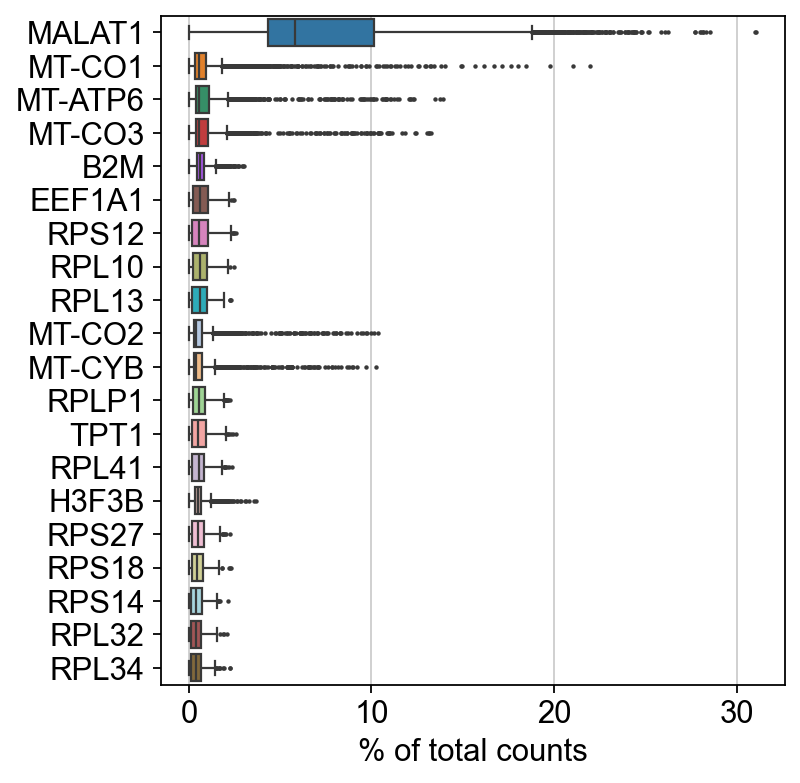

In [8]:
sc.pl.highest_expr_genes(adata, n_top=20, ) # Plotting genes that yield the highest fraction of counts in each single cell

In [9]:
sc.pp.filter_cells(adata, min_genes=200)# filters out cells with few transcripts
sc.pp.filter_genes(adata, min_cells=3) # filters out genes expressed in few cells

filtered out 21 cells that have less than 200 genes expressed
filtered out 12946 genes that are detected in less than 3 cells


In [10]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [13]:
density_norm='width'

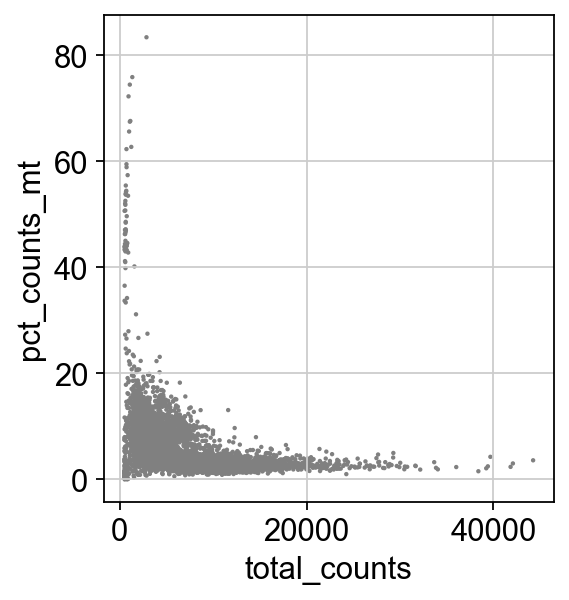

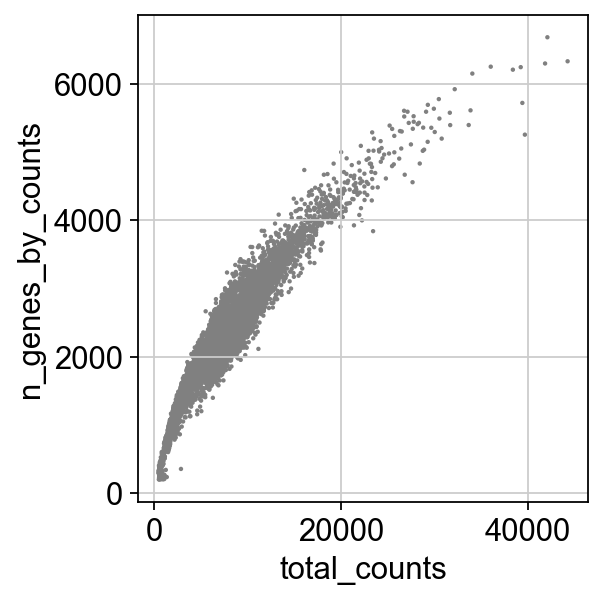

In [16]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')


In [17]:
adata = adata[adata.obs.n_genes_by_counts < 2500, :] #Total-count normalize (library-size correct) the data matrix X to 10,000 reads per cell, so that counts become comparable among cells
adata = adata[adata.obs.pct_counts_mt < 5, :]

In [18]:
sc.pp.normalize_total(adata, target_sum=1e4)#Logarithmize the data:

normalizing counts per cell
    finished (0:00:00)


/Users/pfb16/miniconda3/envs/final_project/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [19]:
sc.pp.log1p(adata) #Identify highly-variable genes.

In [20]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5) # extracting highly variable genes

extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


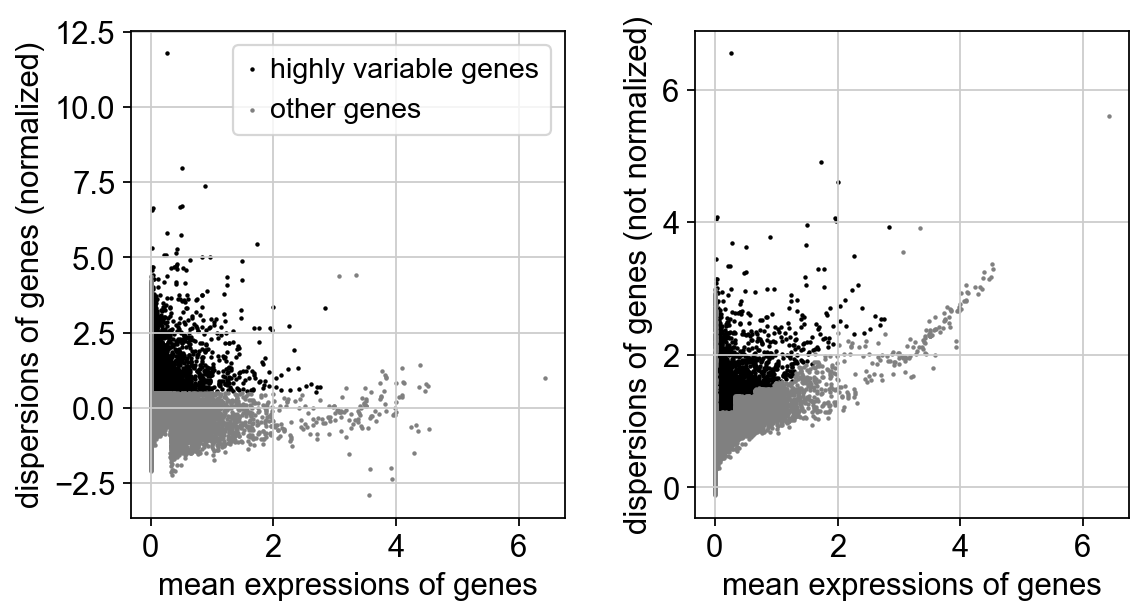

In [22]:
sc.pl.highly_variable_genes(adata) #Set the .raw attribute of the AnnData object to the normalized and logarithmized raw gene expression for later use in differential testing and visualizations of gene expression. This simply freezes the state of the AnnData object.
#You can get back an AnnData of the object in .raw by calling .raw.to_adata().

In [ ]:
adata.raw = adata